<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/assignments/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

In [1]:
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_a1.sh > fetch_a1.sh
!bash fetch_a1.sh

# Example
time_series = pd.read_csv('a1_beer_time_series.csv', 
                        names=['date','megaliters'], 
                          parse_dates=['date']).set_index('date')
data = pd.read_csv('a1_beer_data.csv').set_index('month')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   210  100   210    0     0   3281      0 --:--:-- --:--:-- --:--:--  3281
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8004  100  8004    0     0  26415      0 --:--:-- --:--:-- --:--:-- 26503
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3064  100  3064    0     0  11021      0 --:--:-- --:--:-- --:--:-- 11061


# Problem 1
Consider the data below for monthly beer production. Use the code below and the output produced to answer the following questions

### Problem 1a
Treating the previous years as separate series, calculate a best estimate for beer production in **September 1989** from the mean and MSE for previous years. 

Include a 95% prediction interval (`z=1.96`) in your answer, and write as: `123.45 +- 4.56`

### Problem 1b
Plot and describe any observed pattern types in the data

### Problem 1c
After visualizing the data, Do you think that estimating future years production using a simple average of previous years is a good choice for this data? Why or why not?

## Problem 1a

### Inspecting the data

Let's start by printing out the data. The `data` variable is called a `DataFrame`, which is a table-like data structure with rows and columns. In this case, we have a row for each month and a columns for each year of observations. 

Notice the `NaN` ("Not a number") values, or data for which we don't have observations.

Note that you may have to scroll to the right (over the table output) to see more years.

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

In [2]:
display(data)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
January,93.2,95.9,96.3,89.8,97.1,105.1,100.0,106.0,106.1,106.9,104.6,116.4,131.5,131.2,126.9,132.6,128.1,153.1,164.1,161.4,182.7,159.8,170.7,173.7,170.0,203.6,159.4,141.6,151.5,166.5,161.2,177.2,154.1,153.3,172.0,164.4,147.0,139.0,151.0,138.0
February,96.0,82.8,84.4,84.4,93.0,92.5,84.8,91.2,102.1,96.6,107.1,112.6,131.0,125.4,124.0,123.7,138.4,147.6,142.8,169.4,145.2,157.8,164.4,153.8,158.4,175.2,161.1,148.1,158.1,151.3,155.5,127.4,159.3,144.3,150.6,148.1,133.0,143.0,134.0,136.0
March,95.2,83.3,91.2,87.2,96.0,97.1,94.3,96.6,105.2,127.3,123.5,123.8,130.5,126.5,135.7,153.3,152.7,157.7,157.9,168.8,182.1,168.2,179.7,175.6,176.1,168.7,172.1,184.9,143.0,146.2,141.9,177.1,160.4,169.6,163.3,152.0,163.0,150.0,164.0,152.0
April,77.1,80.0,81.9,85.6,80.5,81.4,87.1,96.3,101.0,98.2,98.8,103.6,118.9,119.4,130.0,134.0,120.0,137.2,159.2,158.1,158.7,158.4,157.0,147.1,156.2,155.9,158.4,132.5,151.2,148.3,164.6,154.4,151.9,143.7,153.7,144.1,150.0,154.0,126.0,127.0
May,70.9,80.4,80.5,72.0,76.1,79.1,90.3,88.2,84.3,100.2,98.6,113.9,114.3,113.5,109.4,119.6,140.5,151.5,162.2,158.5,141.6,152.0,168.0,160.3,153.2,147.3,114.6,137.3,147.6,144.7,136.2,135.2,148.4,160.1,152.9,155.0,129.0,137.0,131.0,151.0
June,64.8,67.5,70.4,69.2,69.9,72.1,72.4,70.2,87.5,89.4,90.6,98.6,85.7,98.7,117.8,116.2,116.2,98.7,123.1,135.3,132.6,142.2,139.3,135.2,117.9,137.0,159.6,135.5,130.7,123.6,126.8,126.4,139.6,135.6,135.5,124.5,131.0,129.0,125.0,130.0
July,70.1,75.7,74.8,77.5,73.6,78.7,84.9,86.5,92.7,95.3,89.1,95.0,104.6,114.5,120.3,118.6,121.4,145.8,130.0,149.3,139.6,137.2,138.6,148.8,149.8,141.1,159.7,121.7,137.5,151.6,152.5,147.3,148.2,141.8,148.5,153.0,145.0,128.0,127.0,119.0
August,77.3,71.1,75.9,78.1,92.6,87.1,92.7,88.2,94.4,104.2,105.2,116.0,105.1,113.8,121.0,130.7,127.8,151.7,150.1,143.4,147.0,152.6,153.4,151.0,156.6,167.4,159.4,166.1,146.1,133.9,126.6,140.6,153.5,159.9,148.4,146.0,137.0,140.0,143.0,153.0
September,79.5,89.3,86.3,94.3,94.2,91.4,92.2,102.8,113.0,106.4,114.0,113.9,117.3,133.1,132.3,129.3,143.6,129.4,169.4,142.2,166.6,166.8,138.9,148.2,166.7,160.2,160.7,146.8,133.6,137.4,150.1,152.3,145.1,145.7,133.6,138.0,138.0,143.0,143.0,NaN


### Calculating the mean and mean squared error for each month

To estimate the mean and mean squared error (MSE), we can use the `.mean(axis=1)` and `.var(axis=1)` functions on the `data` `DataFrame`. 

The `axis=1` argument means that we want to take the mean/var over the *rows*). 

We can assign the output of these functions to a _new_ column in the dataframe using the code below. 

This code will compute the mean and MSE for each month, and leave out the `NaN` values appropriately, then print out the `DataFrame` with the new columns included. 

*Use this data to answer question 1a), recalling the formula for computing a one-step prediction interval using the `MSE`. 

*Press the play button in Google Colab or press `Shift+Enter` to execute the cell below*

In [3]:
# Create a new column that holds the mean for each month
data['mean'] = data.mean(axis=1)
data['MSE'] = data.var(axis=1)
display(data)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,mean,MSE
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
January,93.2,95.9,96.3,89.8,97.1,105.1,100.0,106.0,106.1,106.9,104.6,116.4,131.5,131.2,126.9,132.6,128.1,153.1,164.1,161.4,182.7,159.8,170.7,173.7,170.0,203.6,159.4,141.6,151.5,166.5,161.2,177.2,154.1,153.3,172.0,164.4,147.0,139.0,151.0,138.0,139.575000,865.254875
February,96.0,82.8,84.4,84.4,93.0,92.5,84.8,91.2,102.1,96.6,107.1,112.6,131.0,125.4,124.0,123.7,138.4,147.6,142.8,169.4,145.2,157.8,164.4,153.8,158.4,175.2,161.1,148.1,158.1,151.3,155.5,127.4,159.3,144.3,150.6,148.1,133.0,143.0,134.0,136.0,130.860000,739.889400
March,95.2,83.3,91.2,87.2,96.0,97.1,94.3,96.6,105.2,127.3,123.5,123.8,130.5,126.5,135.7,153.3,152.7,157.7,157.9,168.8,182.1,168.2,179.7,175.6,176.1,168.7,172.1,184.9,143.0,146.2,141.9,177.1,160.4,169.6,163.3,152.0,163.0,150.0,164.0,152.0,142.342500,931.489944
April,77.1,80.0,81.9,85.6,80.5,81.4,87.1,96.3,101.0,98.2,98.8,103.6,118.9,119.4,130.0,134.0,120.0,137.2,159.2,158.1,158.7,158.4,157.0,147.1,156.2,155.9,158.4,132.5,151.2,148.3,164.6,154.4,151.9,143.7,153.7,144.1,150.0,154.0,126.0,127.0,128.535000,817.037775
May,70.9,80.4,80.5,72.0,76.1,79.1,90.3,88.2,84.3,100.2,98.6,113.9,114.3,113.5,109.4,119.6,140.5,151.5,162.2,158.5,141.6,152.0,168.0,160.3,153.2,147.3,114.6,137.3,147.6,144.7,136.2,135.2,148.4,160.1,152.9,155.0,129.0,137.0,131.0,151.0,125.160000,873.250900
June,64.8,67.5,70.4,69.2,69.9,72.1,72.4,70.2,87.5,89.4,90.6,98.6,85.7,98.7,117.8,116.2,116.2,98.7,123.1,135.3,132.6,142.2,139.3,135.2,117.9,137.0,159.6,135.5,130.7,123.6,126.8,126.4,139.6,135.6,135.5,124.5,131.0,129.0,125.0,130.0,111.782500,703.901444
July,70.1,75.7,74.8,77.5,73.6,78.7,84.9,86.5,92.7,95.3,89.1,95.0,104.6,114.5,120.3,118.6,121.4,145.8,130.0,149.3,139.6,137.2,138.6,148.8,149.8,141.1,159.7,121.7,137.5,151.6,152.5,147.3,148.2,141.8,148.5,153.0,145.0,128.0,127.0,119.0,120.857500,777.518444
August,77.3,71.1,75.9,78.1,92.6,87.1,92.7,88.2,94.4,104.2,105.2,116.0,105.1,113.8,121.0,130.7,127.8,151.7,150.1,143.4,147.0,152.6,153.4,151.0,156.6,167.4,159.4,166.1,146.1,133.9,126.6,140.6,153.5,159.9,148.4,146.0,137.0,140.0,143.0,153.0,127.697500,803.705244
September,79.5,89.3,86.3,94.3,94.2,91.4,92.2,102.8,113.0,106.4,114.0,113.9,117.3,133.1,132.3,129.3,143.6,129.4,169.4,142.2,166.6,166.8,138.9,148.2,166.7,160.2,160.7,146.8,133.6,137.4,150.1,152.3,145.1,145.7,133.6,138.0,138.0,143.0,143.0,NaN,130.476923,621.976647


### Problem 1a Answer

*Please delete this text and type your answer to Problem 1a here*

## Problem 1b

### Plotting the time series

The `time_series` `DataFrame` contains all fo the data in order, stacked on top of each other, with the `megaliters` column containing the value of the production for each year and month combination. We'll use this to create a simple time series plot of the data

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

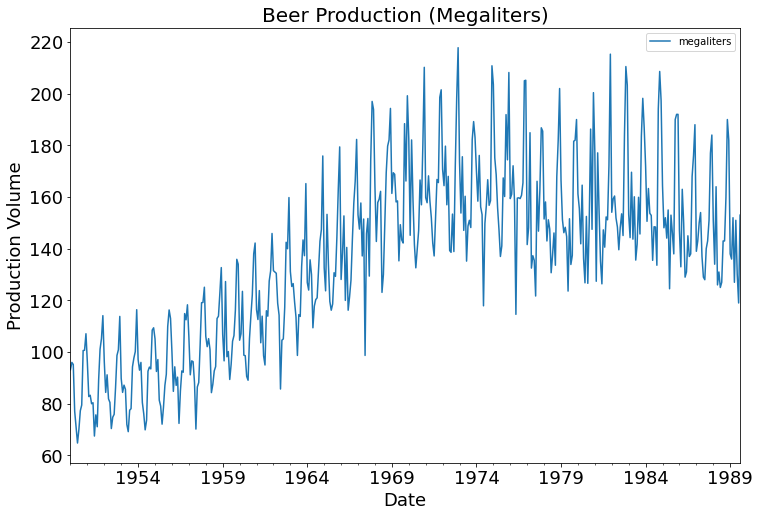

In [4]:
FONT_SIZE = 18
f = plt.figure(figsize=(12,8))
ax=plt.subplot()
time_series.plot(ax=ax,fontsize=FONT_SIZE)
title = plt.title('Beer Production (Megaliters)', size=FONT_SIZE+2)
x_yabel = plt.xlabel('Date', size=FONT_SIZE)
y_yabel = plt.ylabel('Production Volume', size=FONT_SIZE)

### Problem 1b Answer

*Please delete this text and type your answer to Problem 1b here*

## Problem 1c

### Problem 1c Answer

*Please delete this text and type your answer to Problem 1c here*

# Problem 2
For each of the following series, what sort of time patterns would you expect to see?

1. Monthly retail sales of computer disks for the past 10 years at your local store.
2. ProblemHourly pulse rate of a person for one week.
3. Daily sales at a fast-food store for six months.
4. Weekly electricity consumption for your local area over the past 10 years.


### Problem 2 Answers

*Please delete this text and type your answer(s) to Problem 2 here*